In [1]:
from PIL import Image
import numpy as np

## Opening the image with Pillow

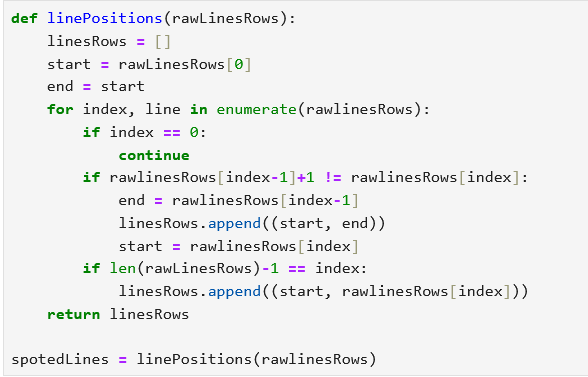

In [2]:
img = Image.open("sample4.png")
display(img)

## Grayscaling
### Formula: Y = 0.2126R+0.7152G+0.0722B

### 1. Convertion of the image into a list of matrices each one representing R, G and B

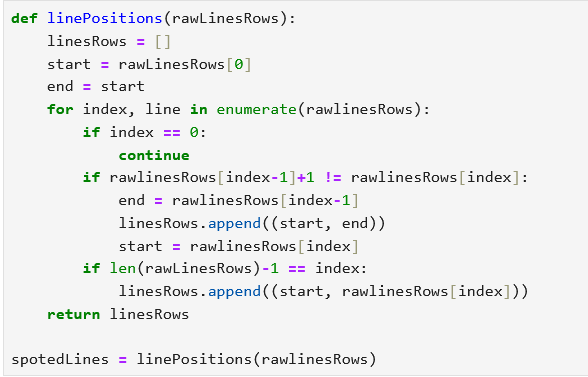

In [3]:
pix = np.array(img)
display(Image.fromarray(np.uint8(pix)))

In [4]:
pix.shape

(377, 588, 4)

### 2. Function to convert the matrix in to a level of GrayScale

In [5]:
def grayScale(matrix, scale):
    grayImage = np.zeros(matrix.shape)
    R = np.array(matrix[:, :, 0])
    G = np.array(matrix[:, :, 1])
    B = np.array(matrix[:, :, 2])

    R = (R * scale[0])
    G = (G * scale[1])
    B = (B * scale[2])

    Y = R+G+B

    for i in range(3):
       grayImage[:,:,i] = Y

    return Image.fromarray(np.uint8(grayImage))


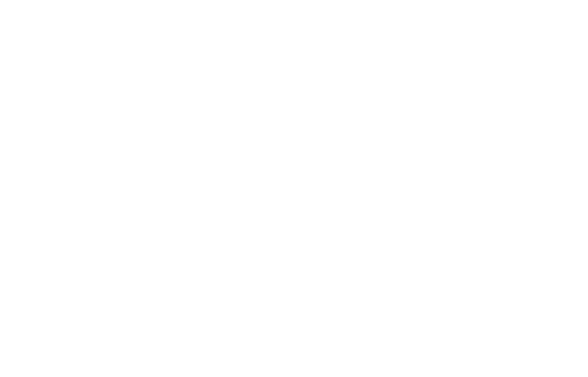

In [6]:
#newImg = grayScale(pix, [0.2126, 0.7252, 0.0722])
newImg = grayScale(pix, [0.2989, 0.5870, 0.1140]) 
#newImage = img.convert('LA')
#display(Image.fromarray(np.uint8(np.array(newImg)[:, :, 2])))
display(newImg)

## Feature Extraction

In [7]:
#chanel = np.uint8(np.array(newImg)[:, :, 3]) # select any chanel
chanel = np.array(newImg)[:, :, 0]
flattenedChanel = chanel.flatten()
meanPix = np.mean(flattenedChanel, axis = 0)
meanPix

235.64870802432378

In [8]:
chanel.shape

(377, 588)

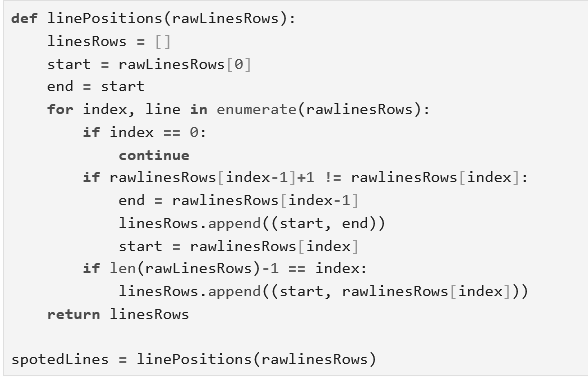

In [9]:
display(Image.fromarray(chanel))

In [10]:
np.unique(flattenedChanel)
# for x in range(len(chanel)):
#     print(chanel[x])

array([ 29,  31,  58,  60,  69,  75,  77,  79,  82,  84,  86,  87,  88,
        90,  91,  92,  93,  95,  97,  99, 100, 101, 102, 105, 106, 107,
       109, 110, 111, 114, 115, 116, 118, 119, 121, 122, 123, 125, 126,
       128, 129, 130, 133, 134, 136, 137, 140, 141, 143, 144, 148, 149,
       151, 152, 153, 157, 158, 160, 162, 163, 165, 167, 174, 175, 177,
       179, 181, 182, 183, 185, 186, 188, 191, 192, 194, 198, 201, 204,
       205, 207, 208, 211, 212, 214, 216, 217, 218, 219, 220, 221, 223,
       224, 225, 230, 234, 237, 240, 244, 254], dtype=uint8)

In [11]:
# find the first line where a black dot is spotted
def firstLineRow(chanel, grade):
    blackDots = []
    for x in range(len(chanel)):
        for y in range(len(chanel[x])):
            if chanel[x][y] >= grade:
                blackDots.append(x)
    return min(blackDots)
                
r = firstLineRow(chanel, 128)

In [12]:
def lineGaps(chanel, grade, startingRow):
    blackDotsLines = dict() #lines where blackdots are spotted
    for x in range(startingRow, len(chanel)):
        blackDots = []
        for y in range(len(chanel[x])):
            if chanel[x][y] >= grade:
                blackDots.append(y)
        blackDotsLines[x] = blackDots

    copyOfBlackDotsLines = blackDotsLines.copy()
    for row, cols in blackDotsLines.items():
        if len(cols)==0:
            del copyOfBlackDotsLines[row]
    return copyOfBlackDotsLines

In [13]:
rows = lineGaps(chanel, 128, r)
list(rows.values())[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
def remblankLines(chanel, grade, startingRow):
    blackDottedLines = dict()
    for x in range(startingRow, len(chanel)):
        blackDots = []
        for y in range(len(chanel[x])):
            if chanel[x][y] < grade:
                blackDots.append(y)
        blackDottedLines[x] = blackDots
    
    copyOfBlackDottedLines = blackDottedLines.copy()
    for row, cols in blackDottedLines.items():
        if cols==[]:
            del copyOfBlackDottedLines[row]
    return copyOfBlackDottedLines

In [15]:
rawlinesRows = remblankLines(chanel, 128, r).keys()
rawlinesRows = list(rawlinesRows)

In [16]:
def linePositions(rawLinesRows):
    linesRows = []
    start = rawLinesRows[0]
    end = start
    for index, line in enumerate(rawlinesRows):
        if index == 0:
            continue
        if rawlinesRows[index-1]+1 != rawlinesRows[index]:
            end = rawlinesRows[index-1]
            linesRows.append((start, end))
            start = rawlinesRows[index]
        if len(rawLinesRows)-1 == index:
            linesRows.append((start, rawlinesRows[index]))
    return linesRows

spotedLines = linePositions(rawlinesRows)
spotedLines

[(11, 25),
 (35, 45),
 (58, 68),
 (80, 90),
 (102, 116),
 (126, 136),
 (150, 159),
 (171, 181),
 (194, 204),
 (216, 230),
 (240, 250),
 (261, 275),
 (284, 298),
 (308, 318),
 (352, 366)]

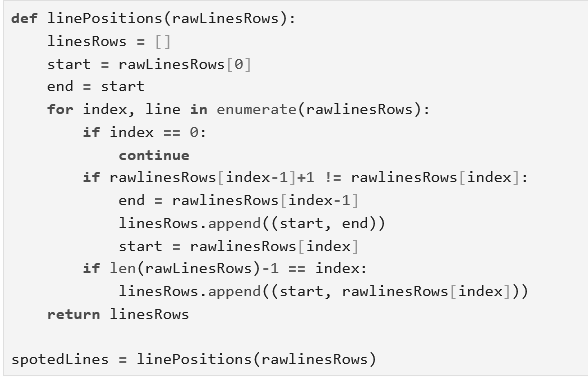

In [17]:
display(Image.fromarray(chanel))

In [18]:
def spotLineEmptyCols(line, chanel, grade):
    cols = []
    for col in range(len(chanel[0])):
        whiteCols = []
        for currentRow in range(line[0], line[1]+1):
            if chanel[currentRow][col] > grade:
                whiteCols.append(col)
        cols.append(whiteCols)
        
    emptyCols = cols.copy()
    for col in cols:
        if len(col) < line[1]-line[0] + 1:
            emptyCols.remove(col)
            
    cols = []
    for listFromCol in emptyCols:
        cols.append(listFromCol[0])
    return cols

In [19]:
rowsBlankSpaces = []              
for line in spotedLines:
    empty = spotLineEmptyCols(line, chanel, 128)
    rowsBlankSpaces.append((line, empty))

rowsBlankSpaces

[((11, 25),
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   19,
   20,
   28,
   29,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   55,
   56,
   64,
   65,
   72,
   73,
   81,
   82,
   83,
   91,
   100,
   101,
   108,
   109,
   110,
   117,
   118,
   126,
   127,
   128,
   135,
   136,
   145,
   153,
   154,
   161,
   162,
   163,
   164,
   170,
   171,
   172,
   173,
   180,
   181,
   188,
   189,
   198,
   199,
   200,
   206,
   207,
   208,
   215,
   216,
   217,
   224,
   225,
   226,
   233,
   234,
   235,
   242,
   243,
   244,
   252,
   260,
   261,
   270,
   271,
   278,
   279,
   280,
   281,
   286,
   287,
   288,
   289,
   290,
   293,
   294,
   295,
   296,
   297,
   298,
   299,
   300,
   301,
   302,
   303,
   304,
   305,
   306,
   307,
   308,
   309,
   310,
   311,
   312,
   313,
   314,
   315,
   316,
   317,
   318,
   319,
   320,
   321,
   322,
   323,
   324,
   325,
   

In [20]:
def rowLettersBoundaries(rowBlankSpace):
    letters = [] # col references of the columns
    letterCols = [] # current letter columns
    lettersMatrices = [] # set of letters
    letterMatrix = [] # top left, top right, bottom right and bottom left of the letter
    for col in range(len(chanel[0])):
        if col in rowBlankSpace[1]:
            if letterCols != []:
                letters.append(letterCols)
            letterCols = []
        else:
            letterCols.append(col)

    rows = rowBlankSpace[0]
    for letterCols in letters:
        letterMatrix.append((rows[0], letterCols[0]))
        letterMatrix.append((rows[0], letterCols[len(letterCols)-1]))
        letterMatrix.append((rows[len(rows)-1], letterCols[len(letterCols)-1]))
        letterMatrix.append((rows[len(rows)-1], letterCols[0]))

        lettersMatrices.append(letterMatrix)
        letterMatrix = []
    return lettersMatrices

rowsLetters = []
for rowBlankSpace in rowsBlankSpaces:
    rowsLetters.append(rowLettersBoundaries(rowBlankSpace))

rowsLetters

[[[(11, 12), (11, 18), (25, 18), (25, 12)],
  [(11, 21), (11, 27), (25, 27), (25, 21)],
  [(11, 30), (11, 36), (25, 36), (25, 30)],
  [(11, 48), (11, 54), (25, 54), (25, 48)],
  [(11, 57), (11, 63), (25, 63), (25, 57)],
  [(11, 66), (11, 71), (25, 71), (25, 66)],
  [(11, 74), (11, 80), (25, 80), (25, 74)],
  [(11, 84), (11, 90), (25, 90), (25, 84)],
  [(11, 92), (11, 99), (25, 99), (25, 92)],
  [(11, 102), (11, 107), (25, 107), (25, 102)],
  [(11, 111), (11, 116), (25, 116), (25, 111)],
  [(11, 119), (11, 125), (25, 125), (25, 119)],
  [(11, 129), (11, 134), (25, 134), (25, 129)],
  [(11, 137), (11, 144), (25, 144), (25, 137)],
  [(11, 146), (11, 152), (25, 152), (25, 146)],
  [(11, 155), (11, 160), (25, 160), (25, 155)],
  [(11, 165), (11, 169), (25, 169), (25, 165)],
  [(11, 174), (11, 179), (25, 179), (25, 174)],
  [(11, 182), (11, 187), (25, 187), (25, 182)],
  [(11, 190), (11, 197), (25, 197), (25, 190)],
  [(11, 201), (11, 205), (25, 205), (25, 201)],
  [(11, 209), (11, 214), (25

# Normalization

In [21]:
def normalize_character(image_array, top, bottom, left, right, target_size=(15, 15)):
    """
    Crops the character from the image using boundaries and normalizes it to a fixed size.
    """
    # Crop the character using the boundaries
    # cropped = image_array[top:bottom + 1, left:right + 1]
    cropped = np.array(image_array)[top:bottom, left:right]

    # Convert cropped region to PIL Image
    cropped_image = Image.fromarray(cropped)

    # Resize to target size (15x15)
    normalized_image = cropped_image.resize(target_size, Image.Resampling.LANCZOS)

    return np.array(normalized_image)


In [22]:
normalizedLetters = []
for row in rowsLetters:
    for letter in row:
        print(letter)
        normalizedLetters.append(normalize_character(chanel, letter[0][0], letter[2][0], letter[0][1], letter[1][1],))

for index, letter in enumerate(normalizedLetters):
    Image.fromarray(letter).save("./test/" + str(index)+".png")

[(11, 12), (11, 18), (25, 18), (25, 12)]
[(11, 21), (11, 27), (25, 27), (25, 21)]
[(11, 30), (11, 36), (25, 36), (25, 30)]
[(11, 48), (11, 54), (25, 54), (25, 48)]
[(11, 57), (11, 63), (25, 63), (25, 57)]
[(11, 66), (11, 71), (25, 71), (25, 66)]
[(11, 74), (11, 80), (25, 80), (25, 74)]
[(11, 84), (11, 90), (25, 90), (25, 84)]
[(11, 92), (11, 99), (25, 99), (25, 92)]
[(11, 102), (11, 107), (25, 107), (25, 102)]
[(11, 111), (11, 116), (25, 116), (25, 111)]
[(11, 119), (11, 125), (25, 125), (25, 119)]
[(11, 129), (11, 134), (25, 134), (25, 129)]
[(11, 137), (11, 144), (25, 144), (25, 137)]
[(11, 146), (11, 152), (25, 152), (25, 146)]
[(11, 155), (11, 160), (25, 160), (25, 155)]
[(11, 165), (11, 169), (25, 169), (25, 165)]
[(11, 174), (11, 179), (25, 179), (25, 174)]
[(11, 182), (11, 187), (25, 187), (25, 182)]
[(11, 190), (11, 197), (25, 197), (25, 190)]
[(11, 201), (11, 205), (25, 205), (25, 201)]
[(11, 209), (11, 214), (25, 214), (25, 209)]
[(11, 218), (11, 223), (25, 223), (25, 218)]
[

# Binarization of the character

In [23]:
def binarize(character, grade):
    binarized = np.zeros(character.shape)
    for row in range(len(character)):
        for col in range(len(character[row])):
            if character[row][col]<=grade:
                binarized[row][col] = 1
    return binarized


    

In [24]:
binarizedChars = []
for index, letter in enumerate(normalizedLetters):
    binarizedChars.append(binarize(letter, 128))

In [25]:
def trackSectors(binarizedChar):
    width, height = binarizedChar.shape
    centerX, centerY = width // 2, height // 2

    distances = []
    for row in range(len(binarizedChar)):
        for col in range(len(binarizedChar[row])):
            distances.append(np.sqrt((row - centerX)**2 + (col - centerY)**2))
    rad = max(distances)
    
    #size of the tracks
    trackSize = rad / 5

    # default track matrix
    trackSectorMatrix = np.zeros((5, 8), dtype=int)
    sectors = []
    for n in range(5):
        sector = []
        for row in range(len(binarizedChar)):
            for col in range(len(binarizedChar[row])):
                distance = np.sqrt((row - centerX)**2 + (col - centerY)**2)
                if trackSize * n < distance and distance <= trackSize * (n + 1):
                    sector.append(binarizedChar[row][col])
        sectors.append(sector)

    print(sectors)
            

In [26]:
for char in binarizedChars:
    trackSectors(char)
    break

[[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 